In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
# from keras.models import Model
# from keras.layers import Input, Dense

# import tensorflow.python.util.deprecation as deprecation
# deprecation._PRINT_DEPRECATION_WARNINGS = False



from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [3]:
with open('mnist.pkl', 'rb') as f:
    images = pickle.load(f)['images']

In [4]:
images = images.reshape((-1, 28 ** 2))
images = images / 255.

In [5]:
input_stage = Input(shape=(784,))
encoding_stage = Dense(100, activation='relu')(input_stage)
decoding_stage = Dense(784, activation='sigmoid')(encoding_stage)
autoencoder = Model(input_stage, decoding_stage)

In [9]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta')

In [10]:
autoencoder.fit(images, images, epochs=100)

Train on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 3s 284us/sample - loss: 0.6974
Epoch 2/100
10000/10000 [==============================] - 2s 197us/sample - loss: 0.6968
Epoch 3/100
10000/10000 [==============================] - 2s 203us/sample - loss: 0.6962
Epoch 4/100
10000/10000 [==============================] - 2s 224us/sample - loss: 0.6956
Epoch 5/100
10000/10000 [==============================] - 2s 196us/sample - loss: 0.6950
Epoch 6/100
10000/10000 [==============================] - 2s 198us/sample - loss: 0.6944
Epoch 7/100
10000/10000 [==============================] - 2s 198us/sample - loss: 0.6939
Epoch 8/100
10000/10000 [==============================] - 2s 199us/sample - loss: 0.6933
Epoch 9/100
10000/10000 [==============================] - 2s 209us/sample - loss: 0.6928
Epoch 10/100
10000/10000 [==============================] - 2s 219us/sample - loss: 0.6922
Epoch 11/100
10000/10000 [==============================] - 2s 201us/sample 

In [11]:
encoder_output = Model(input_stage, encoding_stage).predict(images[:5])

In [12]:
encoder_output = encoder_output.reshape((-1, 10, 10)) * 255

In [13]:
decoder_output = autoencoder.predict(images[:5])

In [14]:
decoder_output = decoder_output.reshape((-1, 28, 28)) * 255

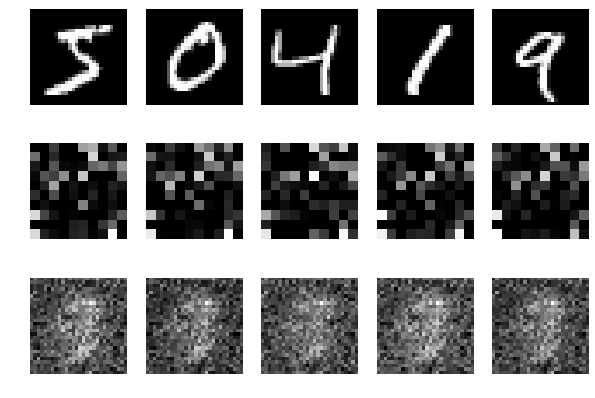

In [15]:
images = images.reshape((-1, 28, 28))
plt.figure(figsize=(10, 7))
for i in range(5):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    
    plt.subplot(3, 5, i + 6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.axis('off')   
    
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoder_output[i], cmap='gray')
    plt.axis('off')        

In [16]:
# Unit Test

In [17]:
import unittest
class TestEncodeDecodeMNIST(unittest.TestCase):   
        
    def test_images(self):
        self.assertEqual(len(images),10000)
        
    def test_input_stage_shape(self):
        self.assertListEqual(list(input_stage.shape),[None, 784])
        
    def test_encoding_stage_shape(self):
        self.assertListEqual(list(encoding_stage.shape),[None, 100])
        
    def test_decoding_stage_spape(self):
        self.assertListEqual(list(decoding_stage.shape),[None, 784])
        
        
    def test_encoder_output_len(self):
        self.assertEqual(len(encoder_output),5)
        
    def test_decoder_output_len(self):
        self.assertEqual(len(decoder_output),5)
        
         

In [18]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestEncodeDecodeMNIST)
unittest.TextTestRunner(verbosity=2).run(suite)

test_decoder_output_len (__main__.TestEncodeDecodeMNIST) ... ok
test_decoding_stage_spape (__main__.TestEncodeDecodeMNIST) ... ok
test_encoder_output_len (__main__.TestEncodeDecodeMNIST) ... ok
test_encoding_stage_shape (__main__.TestEncodeDecodeMNIST) ... ok
test_images (__main__.TestEncodeDecodeMNIST) ... ok
test_input_stage_shape (__main__.TestEncodeDecodeMNIST) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.012s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>